![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [10]:
# Start your code here!
import pandas as pd
import matplotlib.pyplot as plt

women_df = pd.read_csv("women_results.csv")

men_df = pd.read_csv("men_results.csv")

print(women_df.columns)
print(men_df.columns)

print(women_df.head(10))
print(men_df.head(10))

print(women_df.info())
print(men_df.info())

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')
Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')
   Unnamed: 0        date  ... away_score        tournament
0           0  1969-11-01  ...          0              Euro
1           1  1969-11-01  ...          3              Euro
2           2  1969-11-02  ...          0              Euro
3           3  1969-11-02  ...          1              Euro
4           4  1975-08-25  ...          2  AFC Championship
5           5  1975-08-25  ...          2  AFC Championship
6           6  1975-08-27  ...          0  AFC Championship
7           7  1975-08-27  ...          0  AFC Championship
8           8  1975-08-29  ...          0  AFC Championship
9           9  1975-08-29  ...          2  AFC Championship

[10 rows x 7 columns]
   Unnamed: 0        date home_team  ... home_score  away_score

In [11]:
women_df["tournament"].value_counts()


UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

In [12]:
men_df["tournament"].value_counts()

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

In [13]:
FIFA_women = women_df[women_df["tournament"] == "FIFA World Cup"]
FIFA_men = men_df[men_df["tournament"] == "FIFA World Cup"]

FIFA_women['date'] = pd.to_datetime(FIFA_women['date'])
FIFA_men['date'] = pd.to_datetime(FIFA_men['date'])

print(FIFA_women['date'].head())

FIFA_women_2002 = FIFA_women[FIFA_women['date']> "2002-01-01"]
FIFA_men_2002 = FIFA_men[FIFA_men['date']> "2002-01-01"]

FIFA_women_2002['goals_scored'] = FIFA_women['home_score'] + FIFA_women['away_score']
FIFA_men_2002['goals_scored'] = FIFA_men['home_score'] + FIFA_men['away_score']

print(FIFA_women_2002.head())

429   1991-11-16
430   1991-11-17
431   1991-11-17
432   1991-11-17
433   1991-11-17
Name: date, dtype: datetime64[ns]
      Unnamed: 0       date  ...      tournament goals_scored
1600        1600 2003-09-20  ...  FIFA World Cup            3
1601        1601 2003-09-20  ...  FIFA World Cup            2
1602        1602 2003-09-20  ...  FIFA World Cup            5
1603        1603 2003-09-20  ...  FIFA World Cup            6
1604        1604 2003-09-21  ...  FIFA World Cup            4

[5 rows x 8 columns]


<AxesSubplot: ylabel='Frequency'>

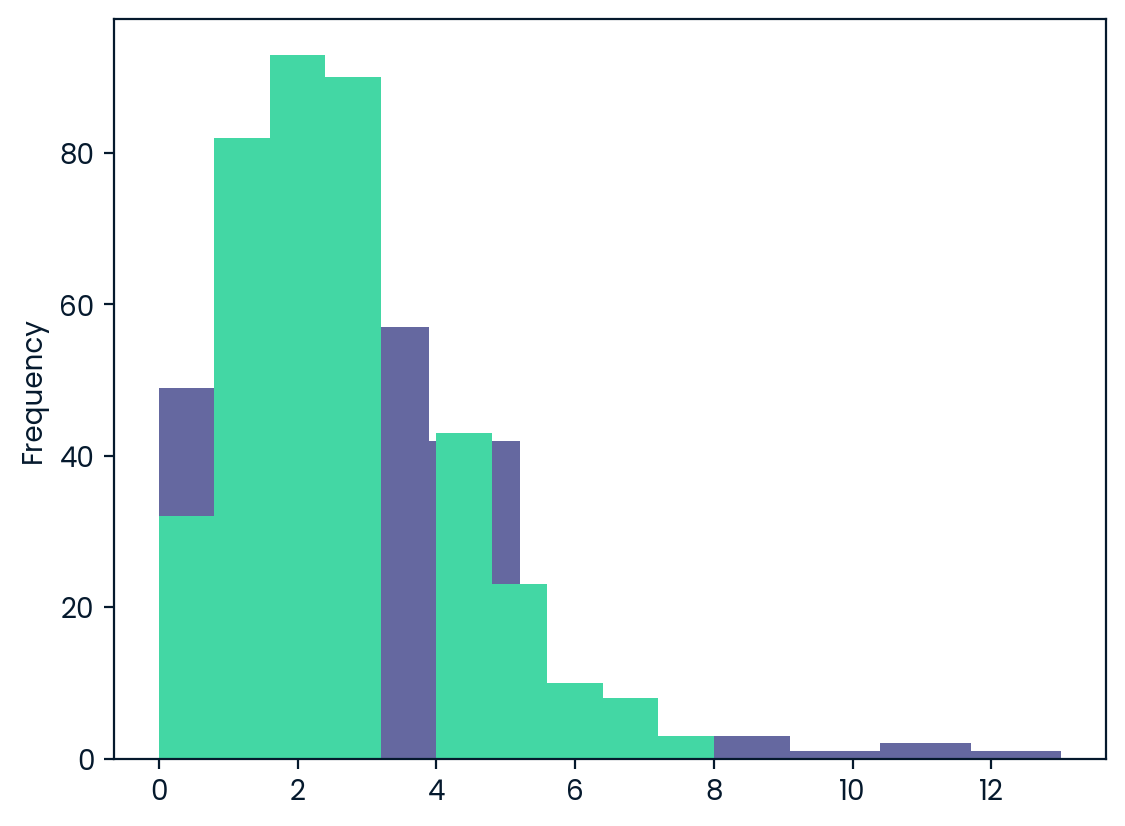

In [14]:
FIFA_women_2002['goals_scored'].plot(kind = 'hist')
FIFA_men_2002['goals_scored'].plot(kind = 'hist')


In [15]:
import pingouin

FIFA_women_2002["gender"] = "men"
FIFA_men_2002["gender"] = "women"

both = pd.concat([FIFA_women_2002, FIFA_men_2002], axis = 0, ignore_index = True)

both_subset = both[["goals_scored", "gender"]]

both_subset_wide = both_subset.pivot(columns = 'gender', values = 'goals_scored')

pingouin.mwu(x=FIFA_women_2002['goals_scored'],y=FIFA_men_2002['goals_scored'],             alternative='greater')  

result_dict = {'p_val': 0.0051066098, 'result': 'reject'}

